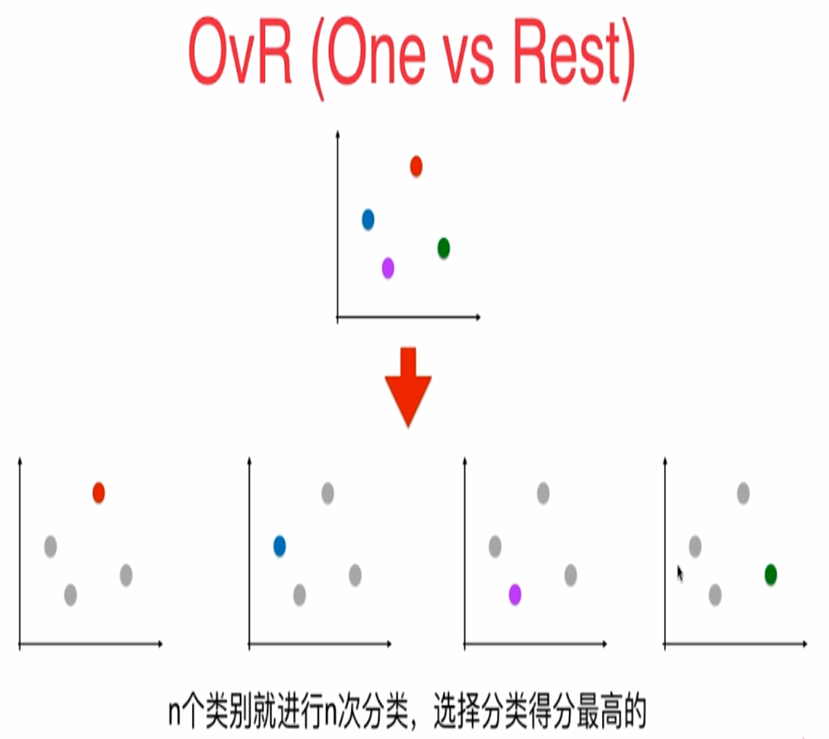

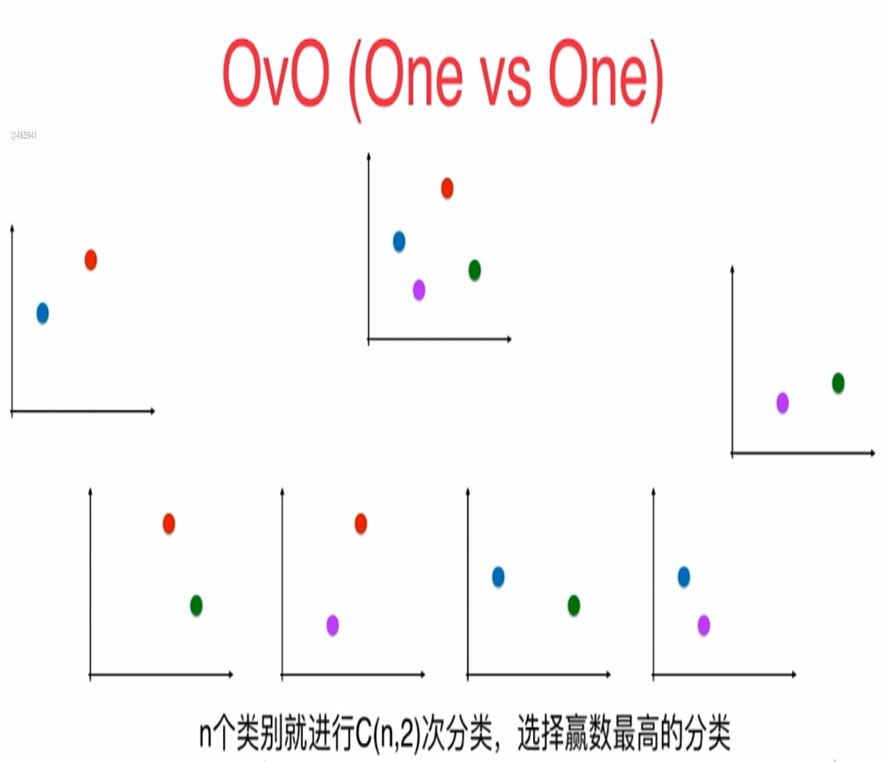

## OvR和OvO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris=datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
log_reg.score(X_train,y_train)

0.7232142857142857

In [6]:
log_reg.score(X_test,y_test)

0.6578947368421053

In [7]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


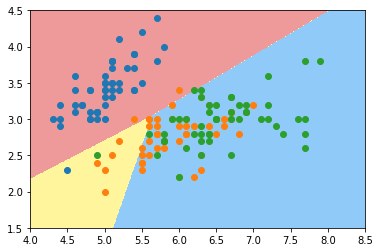

In [8]:
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [9]:
log_reg2 = LogisticRegression(multi_class="multinomial",solver="newton-cg")

In [10]:
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

0.7894736842105263

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


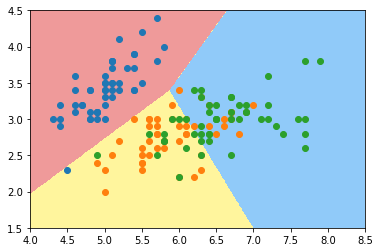

In [12]:
plot_decision_boundary(log_reg2,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

## 使用所有的数据

In [13]:
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9473684210526315

In [15]:
log_reg2 = LogisticRegression(multi_class="multinomial",solver="newton-cg")
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

1.0

## OvR and OvO

In [16]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9473684210526315

In [17]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0